In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:

data=pd.read_csv(r"C:\Users\BVAYA\OneDrive\Desktop\SEM- 4\INT375 PYTHON\Project\consumerpython.csv")

# Step 1: Drop duplicates
data = data.drop_duplicates()

# Step 2: Handle missing values using direct assignment (no inplace on chained calls)
data['Sub-product'] = data['Sub-product'].fillna("Unknown")
data['Sub-issue'] = data['Sub-issue'].fillna("Not provided")
data['Company public response'] = data['Company public response'].fillna("No response")
data['Timely response?'] = data['Timely response?'].fillna("Unknown")

# Step 3: Convert dates to datetime
data['Date submitted'] = pd.to_datetime(data['Date submitted'], errors='coerce')
data['Date received'] = pd.to_datetime(data['Date received'], errors='coerce')

# Step 4: Strip whitespace from object columns
data = data.apply(lambda col: col.str.strip() if col.dtype == "object" else col)

# Step 5: Normalize column names
data.columns = [col.strip().lower().replace(' ', '_') for col in data.columns]

print("✅ Cleaned dataset saved as 'cleaned_consumerpython.csv'")


✅ Cleaned dataset saved as 'cleaned_consumerpython.csv'


In [54]:

print("First 10 Rows")
print(data.head(10))

# Dataset shape
print("\nDataset Shape:", data.shape)

# Column names
print("\nColumns:")
print(data.columns.tolist())

# Data types
print("\nData Types:")
print(data.dtypes)

# Summary statistics for numeric columns
print("\nSummary Statistics (Numerical Columns):")
print(data.describe().info())

# Missing values
print("\nMissing Values:")
print(data.isnull().sum()[data.isnull().sum() > 0])

First 10 Rows
   complaint_id submitted_via date_submitted date_received state  \
0       4848023      Referral     2021-10-24    2021-10-27    NY   
1       3621464           Web     2020-04-24    2020-04-24    FL   
2       5818349           Web     2022-07-27    2022-07-27    CA   
3       7233015      Referral     2023-07-10    2023-07-11    CA   
4       5820224      Referral     2022-07-27    2022-07-28    VA   
5       6237961           Web     2022-11-23    2022-11-23    CA   
6       4348292           Web     2021-05-04    2021-05-04    TX   
7       4090544           Web     2021-01-24    2021-01-24    CA   
8       5337082           Web     2022-03-18    2022-03-18    TX   
9       6203657           Web     2022-11-14    2022-11-14    VA   

                                             product  \
0                                           Mortgage   
1  Money transfer, virtual currency, or money ser...   
2  Credit reporting, credit repair services, or o...   
3            


📋 Product Number Mapping:
1: Checking or savings account
2: Credit card or prepaid card
3: Credit reporting, credit repair services, or other personal consumer reports
4: Mortgage
5: Money transfer, virtual currency, or money service
6: Debt collection
7: Vehicle loan or lease
8: Payday loan, title loan, or personal loan
9: Student loan



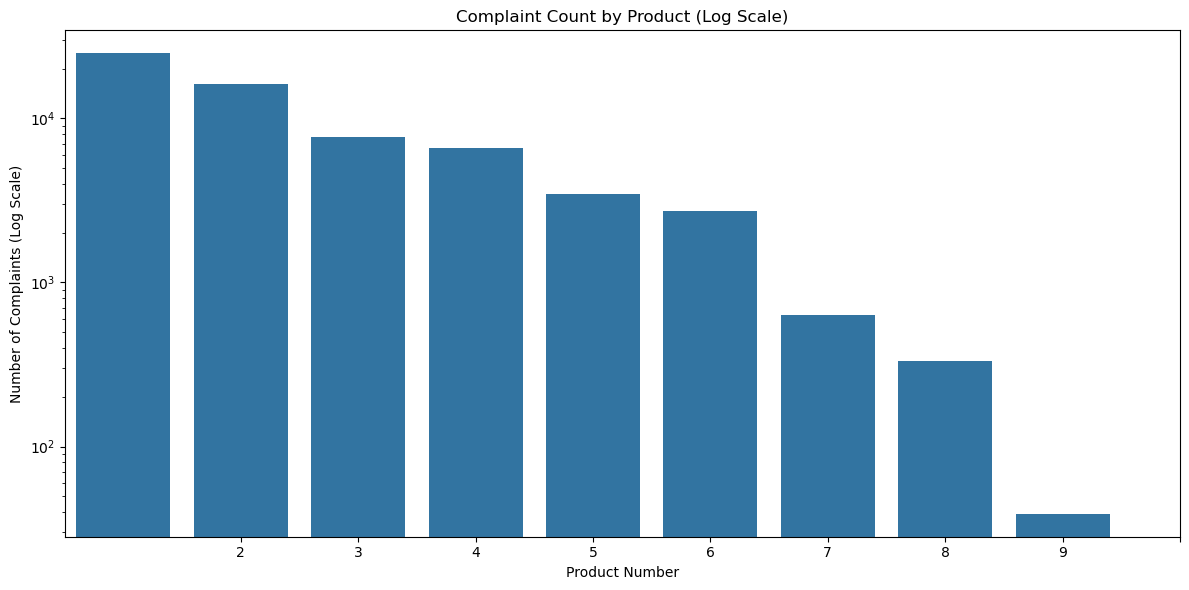

In [36]:
# Objective 2 :-  COmpliant Volume By Product

pd_c = data['product'].value_counts()

# Map products to numbers
product_names = pd_c.index.tolist()
product_numbers = list(range(1, len(product_names) + 1))

# Create bar plot with numeric x-axis
plt.figure(figsize=(12, 6))
sns.barplot(x=product_numbers, y=pd_c.values)
plt.yscale('log')
plt.xticks(product_numbers)  # Show numbers on x-axis
plt.xlabel("Product Number")
plt.ylabel("Number of Complaints (Log Scale)")
plt.title("Complaint Count by Product (Log Scale)")

# Display product number mappings at the edge
print("\n📋 Product Number Mapping:")
for i, name in enumerate(product_names, start=1):
    print(f"{i}: {name}")

print()

plt.tight_layout()
plt.show()


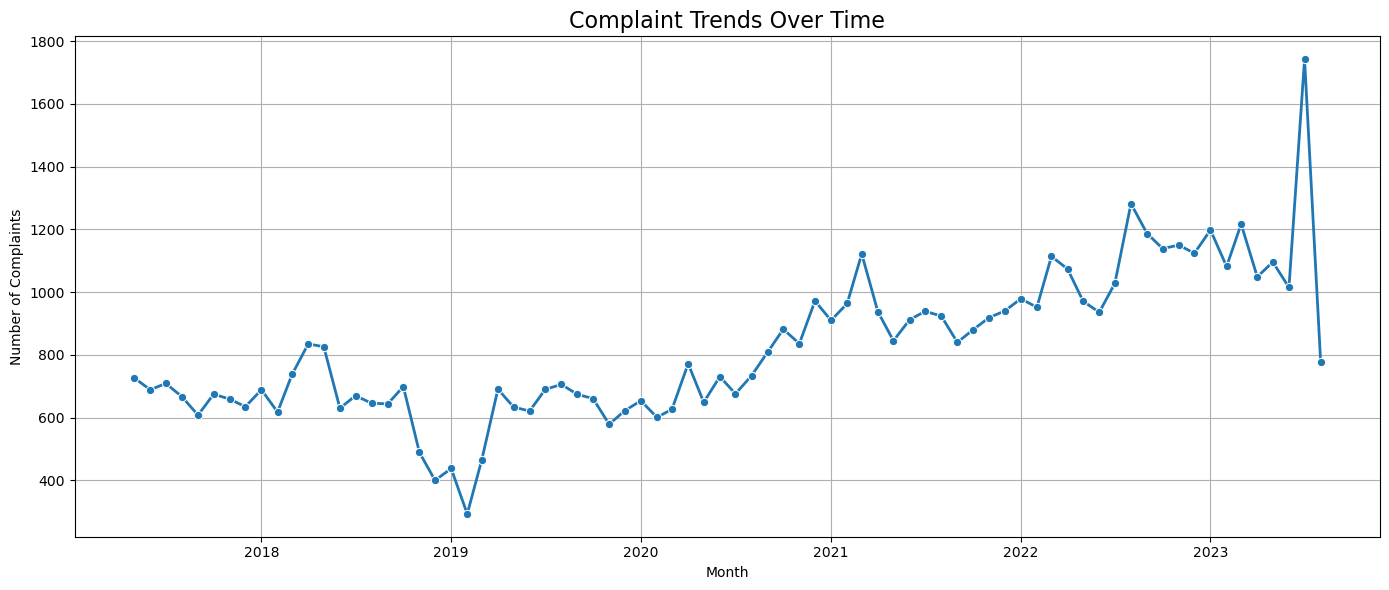

In [40]:
# Objective 3 :- Compliant trends over time

# Convert 'Date received' to datetime
data['date_received'] = pd.to_datetime(data['date_received'], errors='coerce')

# Drop rows with invalid or missing dates
data = data.dropna(subset=['date_received'])

# Group complaints by month
monthly_trend = data.groupby(data['date_received'].dt.to_period('M')).size()

# Convert index to datetime for plotting
monthly_trend.index = monthly_trend.index.to_timestamp()

# Plotting
plt.figure(figsize=(14, 6))
sns.lineplot(x=monthly_trend.index, y=monthly_trend.values, marker='o', linewidth=2)
plt.title("Complaint Trends Over Time", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Number of Complaints")
plt.grid(True)
plt.tight_layout() #Prevents overlap

plt.show()


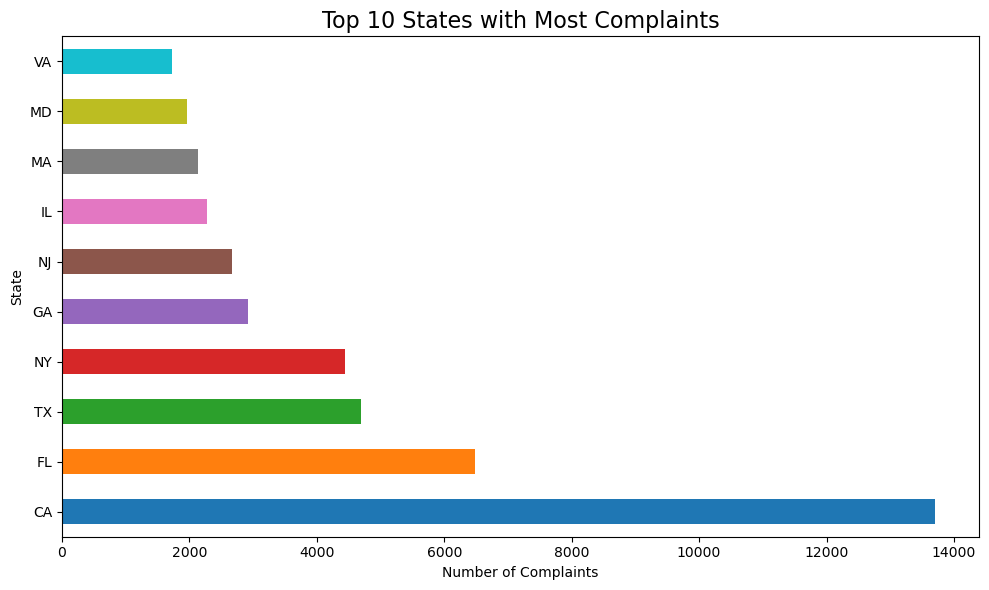

In [42]:
# Objective 4 :- Top states with Most Compliant



# Group by State and count complaints
state_complaints = data['state'].value_counts().head(10)

# Plotting bar chart
c=plt.cm.tab10.colors 
plt.figure(figsize=(10, 6))
state_complaints.plot(kind='barh', color=c)  

plt.title("Top 10 States with Most Complaints", fontsize=16)
plt.xlabel("Number of Complaints")
plt.ylabel("State")
plt.tight_layout()




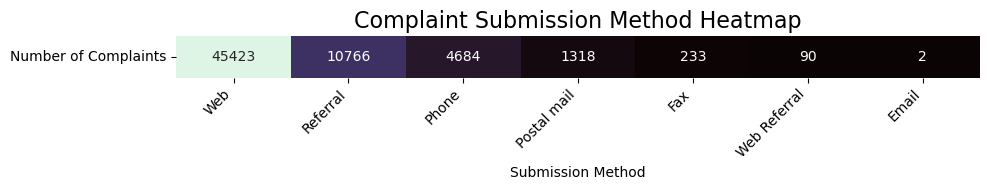

In [44]:
# Objective 5 :- Submission method Analysis


# Count the number of complaints per submission method
method_counts = data['submitted_via'].value_counts().reset_index()
method_counts.columns = ['Submission Method', 'Number of Complaints']

# Convert to a pivot table format for heatmap (1 row, many columns)
heatmap_data = method_counts.set_index('Submission Method').T

# Plotting the heatmap
plt.figure(figsize=(10, 2))  # Compact height
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='mako', cbar=False)

plt.title("Complaint Submission Method Heatmap", fontsize=16)
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Unique values in 'Timely response?':
['Yes' 'Unknown' 'No']

Count of Timely vs Delayed Responses:
timely_response?
Yes        58619
No          2403
Unknown     1494
Name: count, dtype: int64

Percentage of Timely vs Delayed Responses:
timely_response?
Yes        93.77
No          3.84
Unknown     2.39
Name: count, dtype: float64



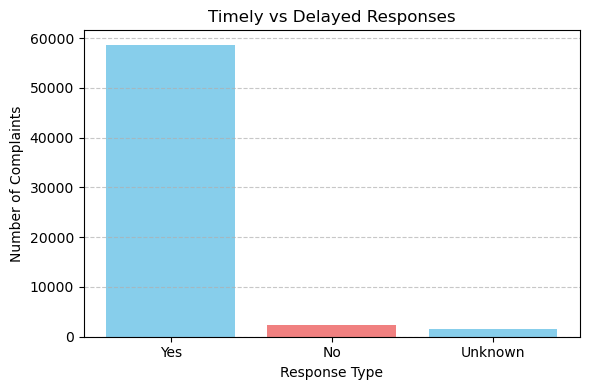

In [48]:
# Objective 6 :- Timely vs Delayed Response

print("Unique values in 'Timely response?':")
print(data['timely_response?'].unique())
print()

# Count of responses
response_counts = data['timely_response?'].value_counts()
print("Count of Timely vs Delayed Responses:")
print(response_counts)
print()

# Percentage of each
response_percent = (response_counts / len(data)) * 100
print("Percentage of Timely vs Delayed Responses:")
print(response_percent.round(2))
print()

# Histogram (as a bar chart, since it's categorical)
plt.figure(figsize=(6, 4))
plt.bar(response_counts.index, response_counts.values, color=['skyblue', 'lightcoral'])
plt.title("Timely vs Delayed Responses")
plt.xlabel("Response Type")
plt.ylabel("Number of Complaints")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

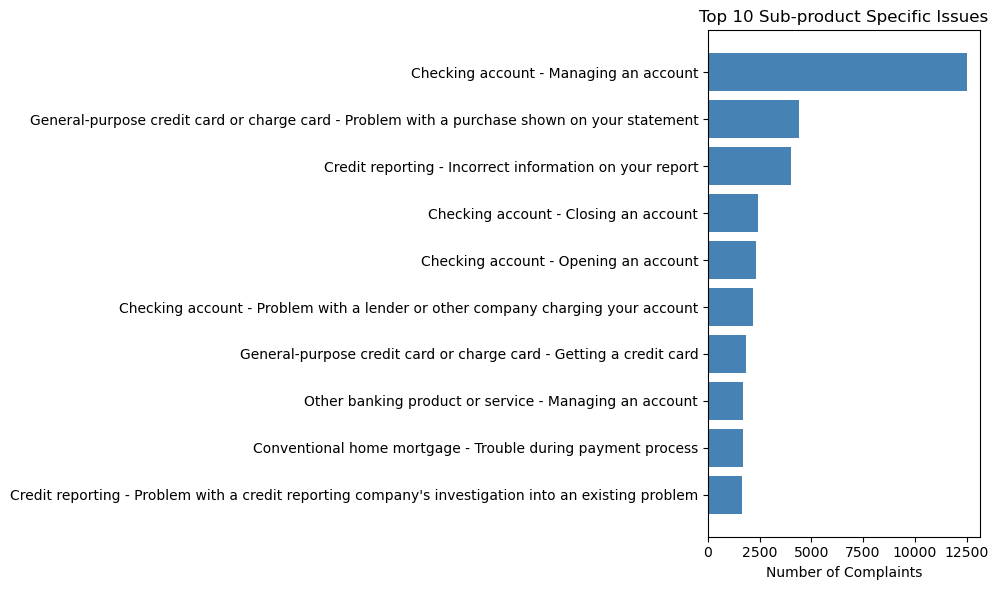

In [52]:
# Objective 7 :- Sub Product Specific issues 

# Grouping data by Sub-product and Issue
sub_product_issues = data.groupby(['sub-product', 'issue']).size().reset_index(name='Count')

# Display top 10 most frequent (Sub-product, Issue) pairs
top_issues = sub_product_issues.sort_values(by='Count', ascending=False).head(10)


# Plotting as histogram-style bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_issues['sub-product'] + " - " + top_issues['issue'], top_issues['Count'], color='steelblue')
plt.xlabel("Number of Complaints")
plt.title("Top 10 Sub-product Specific Issues")
plt.gca().invert_yaxis()  # Highest on top
plt.tight_layout()
plt.show()